# Data Cleaning

In [32]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import norm
from scipy.stats import t
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel 
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

N    3614329
U       5165
Y        332
Name: CA_ANEN, dtype: int64
3614329 5165
10000 213


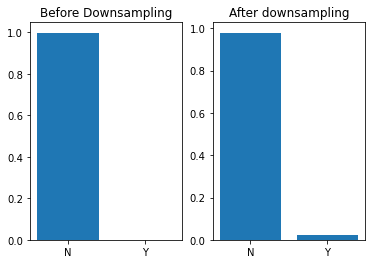

In [33]:
# take a look at our dataset
import pandas as pd 
df2020 = pd.read_csv ('2020Anencephaly.csv') 

df = df2020
print(df['CA_ANEN'].value_counts()) 

df = df.drop(['F_CIGS_0', 'F_CIGS_1', 'F_CIGS_2', 'F_CIGS_3', 'MRTERR', 'MRTERR.1', 'RESTATUS', 'F_TOBACO', 'BFACIL', 'DWgt_R'], axis=1) 
df.head()
df['IP_GON'] = df['IP_GON'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_SYPH'] = df['IP_SYPH'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_CHLAM'] = df['IP_CHLAM'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_HEPB'] = df['IP_HEPB'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_HEPC'] = df['IP_HEPC'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_PDIAB'] = df['RF_PDIAB'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_GDIAB'] = df['RF_GDIAB'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_INFTR'] = df['RF_INFTR'].map({"Y": 1, "N": 0, "U": 0})
df['RF_FEDRG'] = df['RF_FEDRG'].map({'Y': 1, 'N': 0, 'U': 0, 'X': 0}) 
df['CA_ANEN'] = df['CA_ANEN'].map({'Y': 1, 'N': 0, 'U': 0}) 
df = df.dropna()
df = df.astype('int') 
df = df[(df['CIG_0'] != 99)]  
df = df[(df['CIG_1'] != 99)] 
df = df[(df['CIG_2'] != 99)] 
df = df[(df['CIG_3'] != 99)] 
df = df[(df['PRIORLIVE'] != 99)] 
df = df[(df['PRIORDEAD'] != 99)] 
df = df[(df['PRIORTERM'] != 99)]
df = df[(df['ILLB_R'] != 999)] 
df = df[(df['ILOP_R'] != 999)] 
df = df[(df['ILP_R'] != 999)] 
df = df[(df['ILP_R'] != 999)] 
df = df[(df['BMI'] != 99.9)]
df = df[(df['PWgt_R'] != 999)] 
df = df[(df['FAGECOMB'] != 99)] 



df.loc[df["ILLB_R"] == 888, "ILLB_R"] = 0
df.loc[df["ILOP_R"] == 888, "ILOP_R"] = 0
df.loc[df["ILP_R"] == 888, "ILP_R"] = 0 
df_save_for_causal = df 
false_data = df[df['CA_ANEN'] == 0] 
positive_data = df[df['CA_ANEN'] == 1] 

false_data_downsample = resample(false_data,
             replace=True,
             n_samples=10000,
             random_state=42) 
df_resample2020 = pd.concat([false_data_downsample, positive_data]) 
df_resample2020.reset_index(drop=True, inplace=True) 

print(df2020['CA_ANEN'].value_counts()[0], df2020['CA_ANEN'].value_counts()[1])


x1 = np.array(["N", "Y"]) 
y1 = np.array([df2020['CA_ANEN'].value_counts()[0] / len(df2020['CA_ANEN']) , 
               df2020['CA_ANEN'].value_counts()[1] / len(df2020['CA_ANEN'])])
plt.subplot(1, 2, 1)
plt.bar(x1,y1)
plt.title('Before Downsampling')

print(df_resample2020['CA_ANEN'].value_counts()[0], df_resample2020['CA_ANEN'].value_counts()[1])
x2 = np.array(["N", "Y"]) 
y2 = np.array([df_resample2020['CA_ANEN'].value_counts()[0] / len(df_resample2020['CA_ANEN']), 
               df_resample2020['CA_ANEN'].value_counts()[1]/ len(df_resample2020['CA_ANEN'])])
plt.subplot(1, 2, 2)
plt.bar(x2,y2)
plt.title('After downsampling')
plt.show()

In [34]:
df2017 = pd.read_csv ('2017Anencephaly.csv') 
df = df2017
print(df['CA_ANEN'].value_counts()) 

df = df.drop(['F_CIGS_0', 'F_CIGS_1', 'F_CIGS_2', 'F_CIGS_3', 'MRTERR', 'MRTERR.1', 'RESTATUS', 'F_TOBACO', 'BFACIL', 'DWgt_R'], axis=1) 
df.head()
df['IP_GON'] = df['IP_GON'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_SYPH'] = df['IP_SYPH'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_CHLAM'] = df['IP_CHLAM'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_HEPB'] = df['IP_HEPB'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_HEPC'] = df['IP_HEPC'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_PDIAB'] = df['RF_PDIAB'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_GDIAB'] = df['RF_GDIAB'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_INFTR'] = df['RF_INFTR'].map({"Y": 1, "N": 0, "U": 0})
df['RF_FEDRG'] = df['RF_FEDRG'].map({'Y': 1, 'N': 0, 'U': 0, 'X': 0}) 
df['CA_ANEN'] = df['CA_ANEN'].map({'Y': 1, 'N': 0, 'U': 0}) 
df = df.dropna()
df = df.astype('int') 
df = df[(df['CIG_0'] != 99)]  
df = df[(df['CIG_1'] != 99)] 
df = df[(df['CIG_2'] != 99)] 
df = df[(df['CIG_3'] != 99)] 
df = df[(df['PRIORLIVE'] != 99)] 
df = df[(df['PRIORDEAD'] != 99)] 
df = df[(df['PRIORTERM'] != 99)]
df = df[(df['ILLB_R'] != 999)] 
df = df[(df['ILOP_R'] != 999)] 
df = df[(df['ILP_R'] != 999)] 
df = df[(df['ILP_R'] != 999)] 
df = df[(df['BMI'] != 99.9)]
df = df[(df['PWgt_R'] != 999)] 
df = df[(df['FAGECOMB'] != 99)] 

df.loc[df["ILLB_R"] == 888, "ILLB_R"] = 0
df.loc[df["ILOP_R"] == 888, "ILOP_R"] = 0
df.loc[df["ILP_R"] == 888, "ILP_R"] = 0
false_data = df[df['CA_ANEN'] == 0] 
positive_data = df[df['CA_ANEN'] == 1] 
false_data_downsample = resample(false_data,
             replace=True,
             n_samples=10000,
             random_state=42) 
df_resample2017 = pd.concat([false_data_downsample, positive_data]) 
df_resample2017.reset_index(drop=True, inplace=True)

N    3859385
U       4937
Y        432
Name: CA_ANEN, dtype: int64


In [35]:
df2018 = pd.read_csv ('2018Anencephaly.csv') 
df = df2018
print(df['CA_ANEN'].value_counts()) 

df = df.drop(['F_CIGS_0', 'F_CIGS_1', 'F_CIGS_2', 'F_CIGS_3', 'MRTERR', 'MRTERR.1', 'RESTATUS', 'F_TOBACO', 'BFACIL', 'DWgt_R'], axis=1) 
df.head()
df['IP_GON'] = df['IP_GON'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_SYPH'] = df['IP_SYPH'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_CHLAM'] = df['IP_CHLAM'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_HEPB'] = df['IP_HEPB'].map({'Y': 1, 'N': 0, 'U': 0})
df['IP_HEPC'] = df['IP_HEPC'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_PDIAB'] = df['RF_PDIAB'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_GDIAB'] = df['RF_GDIAB'].map({'Y': 1, 'N': 0, 'U': 0})
df['RF_INFTR'] = df['RF_INFTR'].map({"Y": 1, "N": 0, "U": 0})
df['RF_FEDRG'] = df['RF_FEDRG'].map({'Y': 1, 'N': 0, 'U': 0, 'X': 0}) 
df['CA_ANEN'] = df['CA_ANEN'].map({'Y': 1, 'N': 0, 'U': 0}) 
df = df.dropna()
df = df.astype('int') 
df = df[(df['CIG_0'] != 99)]  
df = df[(df['CIG_1'] != 99)] 
df = df[(df['CIG_2'] != 99)] 
df = df[(df['CIG_3'] != 99)] 
df = df[(df['PRIORLIVE'] != 99)] 
df = df[(df['PRIORDEAD'] != 99)] 
df = df[(df['PRIORTERM'] != 99)]
df = df[(df['ILLB_R'] != 999)] 
df = df[(df['ILOP_R'] != 999)] 
df = df[(df['ILP_R'] != 999)] 
df = df[(df['ILP_R'] != 999)] 
df = df[(df['BMI'] != 99.9)]
df = df[(df['PWgt_R'] != 999)] 
df = df[(df['FAGECOMB'] != 99)] 



df.loc[df["ILLB_R"] == 888, "ILLB_R"] = 0
df.loc[df["ILOP_R"] == 888, "ILOP_R"] = 0
df.loc[df["ILP_R"] == 888, "ILP_R"] = 0
false_data = df[df['CA_ANEN'] == 0] 
positive_data = df[df['CA_ANEN'] == 1] 
false_data_downsample = resample(false_data,
             replace=True,
             n_samples=5000,
             random_state=42) 
df_resample2018 = pd.concat([false_data_downsample, positive_data]) 
df_resample2018.reset_index(drop=True, inplace=True)

N    3795073
U       6107
Y        354
Name: CA_ANEN, dtype: int64


In [36]:
df_resample = pd.concat([df_resample2020, df_resample2018, df_resample2017]) 

In [66]:
df_resample = shuffle(df_resample)

# T-test

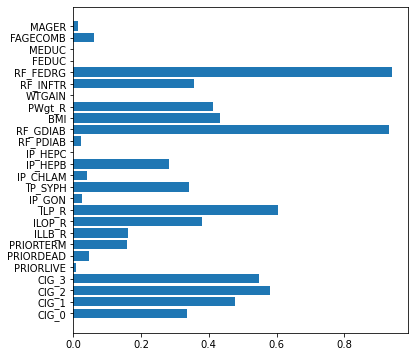

In [67]:
l = df_resample.columns.values.tolist() 
pValues = [] 

for i in range(len(l)-1): 
    results = st.ttest_ind(a=false_data_downsample[l[i]], b=positive_data[l[i]], equal_var=False, alternative='two-sided') 
    #print (l[i])
    #print("  - statistics = {}".format(results.statistic))
    #print("  - p-value = {}".format(results.pvalue)) 
    pValues.append(results.pvalue)

plt.figure(figsize=(6, 6))
bars = ('CIG_0', 'CIG_1', 'CIG_2', 'CIG_3', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'ILLB_R', 'ILOP_R', 'ILP_R', 'IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPB', 'IP_HEPC', 'RF_PDIAB', 'RF_GDIAB', 'BMI', 'PWgt_R', 'WTGAIN', 'RF_INFTR', 'RF_FEDRG', 'FEDUC', 'MEDUC', 'FAGECOMB', 'MAGER')
y_pos = np.arange(len(pValues))
plt.barh(y_pos, pValues)
plt.yticks(y_pos, bars)
plt.show()

# Logistic Regression

In [68]:
print(df_resample['CA_ANEN'].value_counts()[0], df_resample['CA_ANEN'].value_counts()[1]) 

25000 750


In [69]:
# seprate train and val 
train_features = df_resample.iloc[:, :-1] 
train_labels = df_resample.iloc[:, -1] 
feature_names = train_features.columns 
X_train, X_valAndTest, y_train, y_valAndTest = train_test_split(train_features, train_labels, test_size=0.5, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_valAndTest, y_valAndTest, test_size=0.5, random_state=42)  
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test) 

true_positive: 95 false_positive: 2362 false_negative: 80 true_negative: 3900
Best Precision:  0.03929594760540319
Best Recall:  0.5485714285714286
Best F1:  0.07333842627960274
clf LogisticRegression(class_weight='balanced', max_iter=300)
bestK 9
['WTGAIN', 'MEDUC', 'FEDUC', 'PRIORLIVE', 'CIG_0', 'PRIORDEAD', 'CIG_3', 'IP_HEPC', 'MAGER']


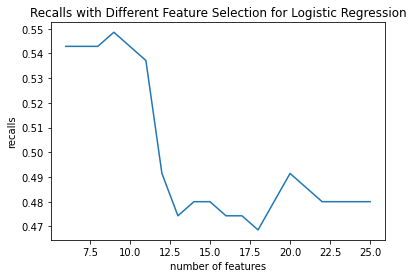

In [120]:
bestModel = None
bestRecall = - float('inf') 
bestFeatureSelection = None
bestPrecision = 0 
bestRecall = 0
bestF1 = 0
bestKValue = 0 
k_arr = [] 
recall_arr = [] 

for bestK in range(X_train.shape[1]-1, 5, -1): 
    s = SelectKBest(f_classif, k=bestK) 
    X_train_new = s.fit_transform(X_train, y_train) 
    X_val_new = s.transform(X_val) 
    clf = LogisticRegression(solver='lbfgs', max_iter=300, class_weight = 'balanced').fit(np.array(X_train_new, 
                                                                                                   dtype = np.float64), 
                                                                                          np.array(y_train,dtype=np.float64)) 
    y_hat = np.dot(X_val_new, clf.coef_.T) + clf.intercept_
    # rmse = np.sqrt(np.mean(np.square(y_val - y_hat)))  
    y_hat[y_hat >= 0.01] = 1
    y_hat[y_hat < 0.01] = 0 
    temp = np.array(y_val)

    true_positive = 0
    false_positive = 0 
    false_negative = 0
    true_negative = 0

    for i in range(len(y_hat)): 
        if y_hat[i] == 1 and temp[i] == 1: 
            true_positive += 1 
        elif y_hat[i] == 1 and temp[i] == 0: 
            false_positive += 1
        elif y_hat[i] == 0 and temp[i] == 1: 
            false_negative += 1 
        else: 
            true_negative += 1 
    # 
    Precision = true_positive / (true_positive + false_positive) 
    Recall = true_positive / (true_positive + false_negative) 
    F1 = 2 * Precision * Recall / (Precision + Recall) 
    k_arr.append(bestK)
    recall_arr.append(Recall) 
    
    #print(Recall)
    if bestRecall < Recall: 
        bestModel = clf
        bestRecall = Recall 
        bestFeatureSelection = s 
        bestPrecision = Precision 
        bestRecall = Recall
        bestF1 = F1
        bestKValue = bestK 
        
print("true_positive:", true_positive, "false_positive:", false_positive, 
      "false_negative:", false_negative, "true_negative:",true_negative)     
print("Best Precision: ",bestPrecision) 
print("Best Recall: ",bestRecall) 
print("Best F1: ",bestF1) 

print("clf", bestModel) 
print("bestK", bestKValue)

indexs = bestFeatureSelection.scores_.argsort()[-bestKValue:][::-1]
important_factor = []
for index in indexs: 
    important_factor.append(l[index]) 
print(important_factor) 


plt.plot(k_arr, recall_arr) 
plt.title('Recalls with Different Feature Selection for Logistic Regression') 
plt.xlabel('number of features') 
plt.ylabel('recalls') 
plt.show()

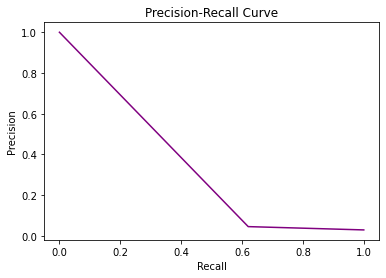

true_positive: 116 false_positive: 2447 false_negative: 71 true_negative: 3804
Best Precision:  0.04525946156847444
Best Recall:  0.6203208556149733
Best F1:  0.08436363636363635


C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


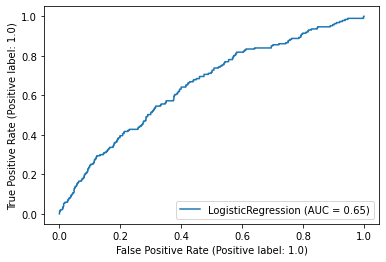

In [121]:
X_test_new = bestFeatureSelection.fit_transform(X_test, y_test) 

y_hat = np.dot(X_test_new, bestModel.coef_.T) + bestModel.intercept_ 
y_hat[y_hat >= 0.01] = 1
y_hat[y_hat < 0.01] = 0 
temp = np.array(y_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

true_positive = 0
false_positive = 0 
false_negative = 0
true_negative = 0

for i in range(len(y_hat)): 
    if y_hat[i] == 1 and temp[i] == 1: 
        true_positive += 1 
    elif y_hat[i] == 1 and temp[i] == 0: 
        false_positive += 1
    elif y_hat[i] == 0 and temp[i] == 1: 
        false_negative += 1 
    else: 
        true_negative += 1 
        
print("true_positive:", true_positive, "false_positive:", false_positive, "false_negative:", 
      false_negative, "true_negative:",true_negative) 
Precision = true_positive / (true_positive + false_positive) 
Recall = true_positive / (true_positive + false_negative) 
F1 = 2 * Precision * Recall / (Precision + Recall) 

print("Best Precision: ",Precision) 
print("Best Recall: ",Recall) 
print("Best F1: ",F1) 
metrics.plot_roc_curve(bestModel, X_test_new, y_test)  

C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


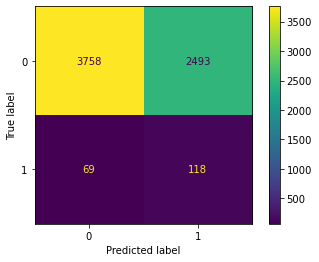

In [122]:
plot_confusion_matrix(bestModel, X_test_new, y_test)  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


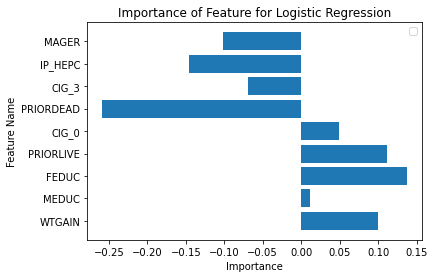

In [123]:
plt.barh(important_factor, bestModel.coef_[0].T)
plt.legend()

plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Importance of Feature for Logistic Regression')

plt.show()

# Random Forest: 

In [88]:
# seprate train and val 
# df_resample = shuffle(df_resample) 
train_features = df_resample.iloc[:, :-1] 
train_labels = df_resample.iloc[:, -1] 
feature_names = train_features.columns 
X_train, X_valAndTest, y_train, y_valAndTest = train_test_split(train_features, train_labels, test_size=0.5, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_valAndTest, y_valAndTest, test_size=0.5, random_state=42)  
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)  

true_positive: 25 false_positive: 620 false_negative: 150 true_negative: 5642
Best Precision:  0.04793756967670011
Best Recall:  0.24571428571428572
Best F1:  0.08022388059701492
clf RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)
bestK 8
['WTGAIN', 'MEDUC', 'FEDUC', 'PRIORLIVE', 'CIG_0', 'PRIORDEAD', 'CIG_3', 'IP_HEPC']


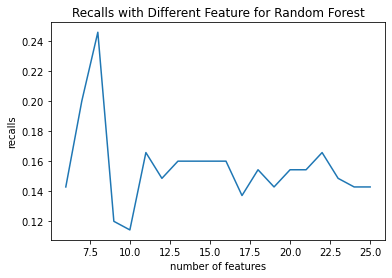

In [90]:
bestModel = None
bestRecall = - float('inf') 
bestFeatureSelection = None
bestPrecision = 0 
bestRecall = 0
bestF1 = 0
bestKValue = 0 
k_arr = [] 
recall_arr = [] 

for bestK in range(X_train.shape[1]-1, 5, -1): 
    s = SelectKBest(f_classif, k=bestK)
    X_train_new = s.fit_transform(X_train, y_train)
    X_val_new = s.transform(X_val)
    clf = RandomForestClassifier(max_depth=10, random_state=42, class_weight = 'balanced')
    
    clf.fit(X_train_new, y_train) 
    y_hat = clf.predict(X_val_new)
    # rmse = np.sqrt(np.mean(np.square(y_val - y_hat)))  
    y_hat[y_hat >= 0.01] = 1
    y_hat[y_hat < 0.01] = 0 
    temp = np.array(y_val)

    true_positive = 0
    false_positive = 0 
    false_negative = 0
    true_negative = 0

    for i in range(len(y_hat)): 
        if y_hat[i] == 1 and temp[i] == 1: 
            true_positive += 1 
        elif y_hat[i] == 1 and temp[i] == 0: 
            false_positive += 1
        elif y_hat[i] == 0 and temp[i] == 1: 
            false_negative += 1 
        else: 
            true_negative += 1 
    # 
    Precision = true_positive / (true_positive + false_positive) 
    Recall = true_positive / (true_positive + false_negative) 
    F1 = 2 * Precision * Recall / (Precision + Recall) 
    k_arr.append(bestK)
    recall_arr.append(Recall) 
    
    #print(Recall)
    if bestRecall < Recall: 
        bestModel = clf
        bestRecall = Recall 
        bestFeatureSelection = s 
        bestPrecision = Precision 
        bestRecall = Recall
        bestF1 = F1
        bestKValue = bestK
        
print("true_positive:", true_positive, "false_positive:", false_positive, "false_negative:", false_negative, "true_negative:",true_negative)     
print("Best Precision: ",bestPrecision) 
print("Best Recall: ",bestRecall) 
print("Best F1: ",bestF1) 

print("clf", bestModel) 
print("bestK", bestKValue)
indexs = bestFeatureSelection.scores_.argsort()[-bestKValue:][::-1]
important_factor = []
for index in indexs: 
    important_factor.append(l[index]) 
print(important_factor) 

plt.plot(k_arr, recall_arr) 
plt.title('Recalls with Different Feature for Random Forest') 
plt.xlabel('number of features') 
plt.ylabel('recalls') 
plt.show()

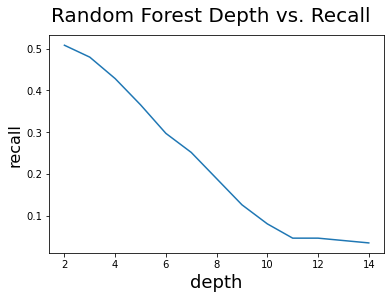

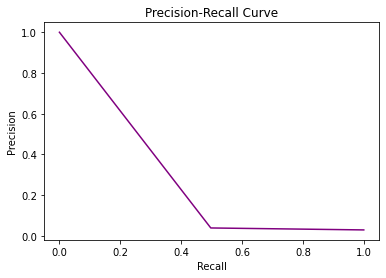

true_positive: 93 false_positive: 2313 false_negative: 94 true_negative: 3938
Best Precision:  0.03865336658354115
Best Recall:  0.49732620320855614
Best F1:  0.0717315850366371


C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


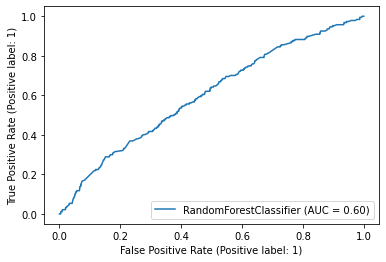

In [76]:
X_test_new = bestFeatureSelection.fit_transform(X_test, y_test) 
X_val_new = bestFeatureSelection.fit_transform(X_val, y_val) 
X_train_new = bestFeatureSelection.fit_transform(X_train, y_train) 

bestRecall = - float('inf') 
bestDepth = -1
depths = [] 
recalls = [] 

for i in range(2, 15): 
    tempModel = RandomForestClassifier(max_depth=i, random_state=42, class_weight = 'balanced')
    tempModel.fit(X_train_new, y_train) 
    y_hat = tempModel.predict(X_val_new) 
    y_hat[y_hat >= 0.01] = 1 
    y_hat[y_hat < 0.01] = 0 
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_hat).ravel() 
    currRecall = tp / (tp + fn)
    if bestRecall < currRecall: 
        bestModel = tempModel
        bestDepth = i 
    depths.append(i) 
    recalls.append(currRecall) 
    
fig = plt.figure()
plt.plot(depths, recalls)
fig.suptitle('Random Forest Depth vs. Recall', fontsize=20)
plt.xlabel('depth', fontsize=18)
plt.ylabel('recall', fontsize=16)

bestModel = RandomForestClassifier(max_depth=2, random_state=42, class_weight = 'balanced') 
bestModel.fit(X_train_new, y_train) 
y_hat = bestModel.predict(X_test_new) 

precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple') 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


y_hat[y_hat >= 0.01] = 1 
y_hat[y_hat < 0.01] = 0 
temp = np.array(y_test)

true_positive = 0 
false_positive = 0 
false_negative = 0 
true_negative = 0 

for i in range(len(y_hat)): 
    if y_hat[i] == 1 and temp[i] == 1: 
        true_positive += 1 
    elif y_hat[i] == 1 and temp[i] == 0: 
        false_positive += 1
    elif y_hat[i] == 0 and temp[i] == 1: 
        false_negative += 1 
    else: 
        true_negative += 1 

print("true_positive:", true_positive, 
      "false_positive:", false_positive, 
      "false_negative:", false_negative, 
      "true_negative:",true_negative) 

Precision = true_positive / (true_positive + false_positive) 
Recall = true_positive / (true_positive + false_negative) 
F1 = 2 * Precision * Recall / (Precision + Recall) 

print("Best Precision: ",Precision) 
print("Best Recall: ",Recall) 
print("Best F1: ",F1) 

metrics.plot_roc_curve(bestModel, X_test_new, y_test)  

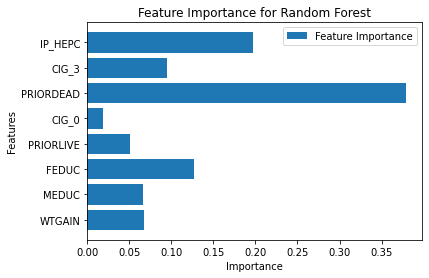

In [77]:
plt.barh(important_factor,bestModel.feature_importances_, label="Feature Importance")
plt.legend()

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')

plt.show()

C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


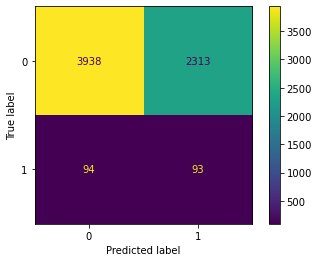

In [78]:
plot_confusion_matrix(bestModel, X_test_new, y_test)  

# SVM + linear

In [109]:
# seprate train and val 
# df_resample = shuffle(df_resample)
train_features = df_resample.iloc[:, :-1] 
train_labels = df_resample.iloc[:, -1] 
feature_names = train_features.columns 
X_train, X_valAndTest, y_train, y_valAndTest = train_test_split(train_features, train_labels, test_size=0.5, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_valAndTest, y_valAndTest, test_size=0.5, random_state=42)  
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)  

Best Precision:  0.03772835583796664
Best Recall:  0.5428571428571428
Best F1:  0.07055328629780913
clf SVC(C=3, class_weight='balanced', kernel='linear')
bestK 11
['WTGAIN', 'MEDUC', 'FEDUC', 'PRIORLIVE', 'CIG_0', 'PRIORDEAD', 'CIG_3', 'IP_HEPC', 'MAGER', 'RF_PDIAB', 'CIG_1']


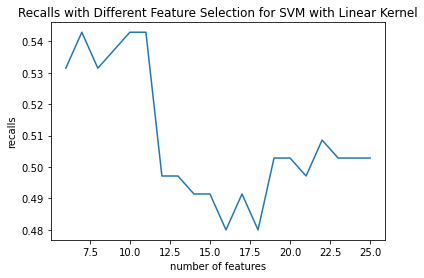

In [110]:
bestModel = None
bestRecall = - float('inf') 
bestFeatureSelection = None
bestPrecision = 0 
bestRecall = 0
bestF1 = 0
bestKValue = 0 
k_arr = [] 
recall_arr = [] 

for bestK in range(X_train.shape[1]-1, 5, -1): 
    s = SelectKBest(f_classif, k=bestK) 
    X_train_new = s.fit_transform(X_train, y_train) 
    X_val_new = s.transform(X_val) 
    clf = svm.SVC(C=3, kernel='linear', class_weight = 'balanced') 
    clf.fit(X_train_new, y_train) 
    y_hat = clf.predict(X_val_new) 
    # rmse = np.sqrt(np.mean(np.square(y_val - y_hat)))  
    y_hat[y_hat >= 0.01] = 1 
    y_hat[y_hat < 0.01] = 0  
    temp = np.array(y_val) 

    true_positive = 0
    false_positive = 0 
    false_negative = 0
    true_negative = 0

    for i in range(len(y_hat)): 
        if y_hat[i] == 1 and temp[i] == 1: 
            true_positive += 1 
        elif y_hat[i] == 1 and temp[i] == 0: 
            false_positive += 1 
        elif y_hat[i] == 0 and temp[i] == 1: 
            false_negative += 1 
        else: 
            true_negative += 1 
    # print("true_positive:", true_positive, "false_positive:", false_positive, "false_negative:", false_negative, "true_negative:",true_negative) 
    Precision = true_positive / (true_positive + false_positive) 
    Recall = true_positive / (true_positive + false_negative) 
    F1 = 2 * Precision * Recall / (Precision + Recall) 
    k_arr.append(bestK)
    recall_arr.append(Recall) 
    
    
    #print(Recall)
    if bestRecall < Recall: 
        bestModel = clf
        bestRecall = Recall 
        bestFeatureSelection = s 
        bestPrecision = Precision 
        bestRecall = Recall
        bestF1 = F1
        bestKValue = bestK
        
    
print("Best Precision: ",bestPrecision) 
print("Best Recall: ",bestRecall) 
print("Best F1: ",bestF1) 

print("clf", bestModel) 
print("bestK", bestKValue) 
indexs = bestFeatureSelection.scores_.argsort()[-bestKValue:][::-1] 
important_factor = [] 
for index in indexs: 
    important_factor.append(l[index]) 
print(important_factor) 

plt.plot(k_arr, recall_arr) 
plt.title('Recalls with Different Feature Selection for SVM with Linear Kernel') 
plt.xlabel('number of features') 
plt.ylabel('recalls') 
plt.show()

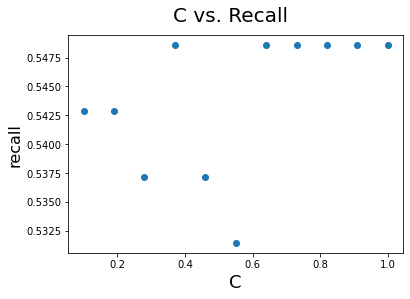

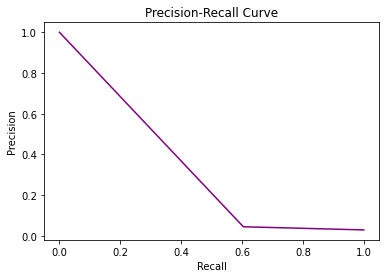

true_positive: 113 false_positive: 2421 false_negative: 74 true_negative: 3830
Best Precision:  0.04459352801894238
Best Recall:  0.6042780748663101
Best F1:  0.08305769937522971


C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


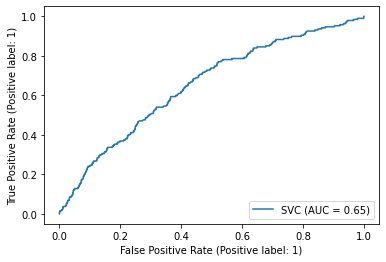

In [119]:
X_train_new = bestFeatureSelection.transform(X_train) 
X_val_new = bestFeatureSelection.transform(X_val) 

bestRecall = - float('inf') 
bestDepth = -1
Cs = [] 
recalls = [] 

Cs = np.linspace(0.1,1,11)

for c_val in Cs: 
    tempModel = svm.SVC(C=c_val, kernel='linear', class_weight = 'balanced') 
    tempModel.fit(X_train_new, y_train) 
    y_hat = tempModel.predict(X_val_new) 

    y_hat[y_hat >= 0.01] = 1 
    y_hat[y_hat < 0.01] = 0 
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_hat).ravel() 
    currRecall = tp / (tp + fn)
    if bestRecall < currRecall: 
        bestModel = tempModel
        bestDepth = i 
    recalls.append(currRecall) 

fig = plt.figure()
plt.scatter(Cs, recalls) 
fig.suptitle('C vs. Recall', fontsize=20)
plt.xlabel('C', fontsize=18)
plt.ylabel('recall', fontsize=16) 

X_test_new = bestFeatureSelection.fit_transform(X_test, y_test) 
y_hat = bestModel.predict(X_test_new) 

precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

y_hat[y_hat >= 0.01] = 1 
y_hat[y_hat < 0.01] = 0 
temp = np.array(y_test)

true_positive = 0 
false_positive = 0 
false_negative = 0 
true_negative = 0 

for i in range(len(y_hat)): 
    if y_hat[i] == 1 and temp[i] == 1: 
        true_positive += 1 
    elif y_hat[i] == 1 and temp[i] == 0: 
        false_positive += 1
    elif y_hat[i] == 0 and temp[i] == 1: 
        false_negative += 1 
    else: 
        true_negative += 1 
        
print("true_positive:", true_positive, 
      "false_positive:", false_positive, 
      "false_negative:", false_negative, 
      "true_negative:",true_negative) 

Precision = true_positive / (true_positive + false_positive) 
Recall = true_positive / (true_positive + false_negative) 
F1 = 2 * Precision * Recall / (Precision + Recall) 

print("Best Precision: ", Precision) 
print("Best Recall: ", Recall) 
print("Best F1: ", F1) 

metrics.plot_roc_curve(bestModel, X_test_new, y_test)  

C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


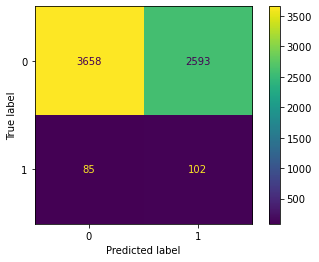

In [113]:
plot_confusion_matrix(bestModel, X_test_new, y_test)  

# SVM + rbf

In [114]:
# seprate train and val 
# df_resample = shuffle(df_resample)
train_features = df_resample.iloc[:, :-1] 
train_labels = df_resample.iloc[:, -1] 
feature_names = train_features.columns 
X_train, X_valAndTest, y_train, y_valAndTest = train_test_split(train_features, train_labels, test_size=0.5, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_valAndTest, y_valAndTest, test_size=0.5, random_state=42)  
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)  

true_positive: 81 false_positive: 1989 false_negative: 94 true_negative: 4273
Best Precision:  0.0391304347826087
Best Recall:  0.46285714285714286
Best F1:  0.07216035634743877
clf SVC(C=0.62, class_weight='balanced')
bestK 6
['WTGAIN', 'MEDUC', 'FEDUC', 'PRIORLIVE', 'CIG_0', 'PRIORDEAD']


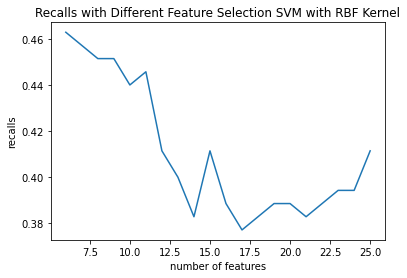

In [115]:
bestModel = None
bestRecall = - float('inf') 
bestFeatureSelection = None
bestPrecision = 0 
bestRecall = 0
bestF1 = 0
bestKValue = 0 
bestTP = 0 
bestFP = 0
bestTN = 0
bestFN = 0
x_val_saved = None
y_val_saved = None
X_val_new = None
k_arr = [] 
recall_arr = [] 

for bestK in range(X_train.shape[1]-1, 5, -1): 
    s = SelectKBest(f_classif, k=bestK)
    X_train_new = s.fit_transform(X_train, y_train)
    X_val_new = s.transform(X_val)

    
    
    clf = svm.SVC(C=0.62, kernel='rbf', class_weight = 'balanced')
    clf.fit(X_train_new, y_train) 
    y_hat = clf.predict(X_val_new)
    
    # rmse = np.sqrt(np.mean(np.square(y_val - y_hat)))  
    y_hat[y_hat >= 0.1] = 1
    y_hat[y_hat < 0.1] = 0 
    temp = np.array(y_val)

    true_positive = 0
    false_positive = 0 
    false_negative = 0
    true_negative = 0

    for i in range(len(y_hat)): 
        if y_hat[i] == 1 and temp[i] == 1: 
            true_positive += 1 
        elif y_hat[i] == 1 and temp[i] == 0: 
            false_positive += 1
        elif y_hat[i] == 0 and temp[i] == 1: 
            false_negative += 1 
        else: 
            true_negative += 1 
    # print("true_positive:", true_positive, "false_positive:", false_positive, "false_negative:", false_negative, "true_negative:",true_negative) 
    Precision = true_positive / (true_positive + false_positive) 
    Recall = true_positive / (true_positive + false_negative) 
    F1 = 2 * Precision * Recall / (Precision + Recall) 
    k_arr.append(bestK)
    recall_arr.append(Recall) 
    
    #print(Recall)
    if bestRecall < Recall: 
        bestModel = clf
        bestRecall = Recall 
        bestFeatureSelection = s 
        bestPrecision = Precision 
        bestRecall = Recall
        bestF1 = F1
        bestKValue = bestK
        bestTP = true_positive
        bestFP = false_positive
        bestFN = false_negative 
        bestTN = true_negative 
    #if bestK == 5: 
        #x_val_saved = x_val_new
        #y_val_saved = y_hat 
        
        
    
        
print("true_positive:", bestTP, "false_positive:", bestFP, "false_negative:", bestFN, "true_negative:",bestTN)     
print("Best Precision: ",bestPrecision) 
print("Best Recall: ",bestRecall) 
print("Best F1: ",bestF1) 

print("clf", bestModel) 
print("bestK", bestKValue)
indexs = bestFeatureSelection.scores_.argsort()[-bestKValue:][::-1]
important_factor = []
for index in indexs: 
    important_factor.append(l[index]) 
print(important_factor) 

plt.plot(k_arr, recall_arr) 
plt.title('Recalls with Different Feature Selection SVM with RBF Kernel') 
plt.xlabel('number of features') 
plt.ylabel('recalls') 
plt.show()

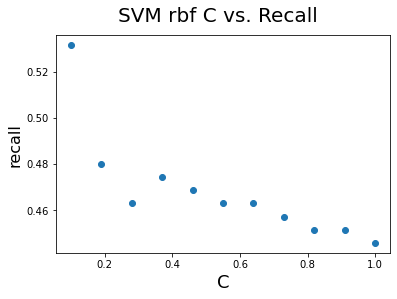

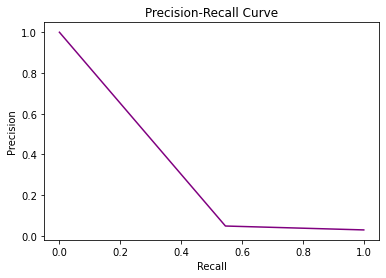

true_positive: 102 false_positive: 2015 false_negative: 85 true_negative: 4236
Best Precision:  0.048181388757675955
Best Recall:  0.5454545454545454
Best F1:  0.08854166666666666


C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


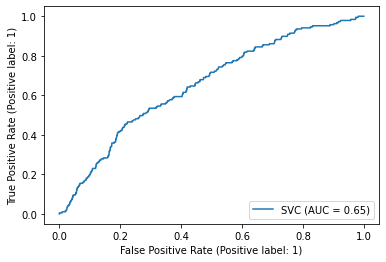

In [117]:
X_train_new = bestFeatureSelection.transform(X_train) 
X_val_new = bestFeatureSelection.transform(X_val) 
X_test_new = bestFeatureSelection.transform(X_test) 

Cs = [] 
recalls = [] 

Cs = np.linspace(0.1,1,11)


for c_val in Cs: 
    tempModel = svm.SVC(C=c_val, kernel='rbf', class_weight = 'balanced') 
    tempModel.fit(X_train_new, y_train) 
    y_hat = tempModel.predict(X_val_new) 

    y_hat[y_hat >= 0.01] = 1 
    y_hat[y_hat < 0.01] = 0 
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_hat).ravel() 
    currRecall = tp / (tp + fn)
    if bestRecall < currRecall: 
        bestModel = tempModel
        bestDepth = i 
    recalls.append(currRecall) 

fig = plt.figure() 
plt.scatter(Cs, recalls) 
fig.suptitle('SVM rbf C vs. Recall', fontsize=20) 
plt.xlabel('C', fontsize=18) 
plt.ylabel('recall', fontsize=16) 

y_hat = bestModel.predict(X_test_new) 

precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show() 

y_hat[y_hat >= 0.01] = 1 
y_hat[y_hat < 0.01] = 0 
temp = np.array(y_test) 

true_positive = 0 
false_positive = 0 
false_negative = 0 
true_negative = 0 

for i in range(len(y_hat)): 
    if y_hat[i] == 1 and temp[i] == 1: 
        true_positive += 1 
    elif y_hat[i] == 1 and temp[i] == 0: 
        false_positive += 1
    elif y_hat[i] == 0 and temp[i] == 1: 
        false_negative += 1 
    else: 
        true_negative += 1 
        
print("true_positive:", true_positive, 
      "false_positive:", false_positive, 
      "false_negative:", false_negative, 
      "true_negative:",true_negative) 

Precision = true_positive / (true_positive + false_positive) 
Recall = true_positive / (true_positive + false_negative) 
F1 = 2 * Precision * Recall / (Precision + Recall) 

print("Best Precision: ", Precision) 
print("Best Recall: ", Recall) 
print("Best F1: ", F1) 

metrics.plot_roc_curve(bestModel, X_test_new, y_test)  

C:\anaconda3\envs\cs590w\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


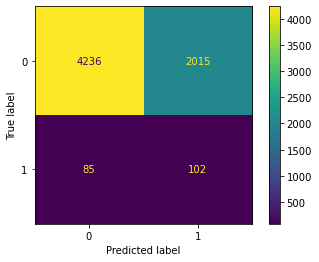

In [118]:
plot_confusion_matrix(bestModel, X_test_new, y_test)  

# 

# DAG Analysis

In [160]:
X = df_resample.iloc[:, :-1] 
y = df_resample.iloc[:, -1] 

In [161]:
l = df.columns.values.tolist() 
print(l)

['CIG_0', 'CIG_1', 'CIG_2', 'CIG_3', 'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'ILLB_R', 'ILOP_R', 'ILP_R', 'IP_GON', 'IP_SYPH', 'IP_CHLAM', 'IP_HEPB', 'IP_HEPC', 'RF_PDIAB', 'RF_GDIAB', 'BMI', 'PWgt_R', 'WTGAIN', 'RF_INFTR', 'RF_FEDRG', 'FEDUC', 'MEDUC', 'FAGECOMB', 'MAGER', 'CA_ANEN']


##  WTGAIN DAG

### Unadjusted Association

In [ ]:
from sklearn.linear_model import LinearRegression

exposure = "WTGAIN" # change for your exposure
outcome = "CA_ANEN" 

df = df_save_for_causal

df_DAG_unadjusted = df[[exposure, outcome]].dropna() 

model = LinearRegression().fit(np.array(df_DAG_unadjusted[exposure],dtype=np.float64).reshape(-1,1), 
                                             np.array(df_DAG_unadjusted['CA_ANEN'],dtype=np.float64))
beta = model.coef_[0]
odds_ratio = np.exp(beta) 

print("The odds ratio for unadjusted association is", odds_ratio) 


positive_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 1]
positive_data = positive_data.drop(columns=['CA_ANEN'])

false_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 0] 
false_data = false_data.drop(columns=['CA_ANEN'])

print("# of positive data", len(positive_data))
print("# of false data", len(false_data))
print("# of total population", len(df))

results = st.ttest_ind(a=false_data, b=positive_data, equal_var=False, alternative='two-sided') 
print("  - statistics = {}".format(results.statistic)) 
print("  - p-value = {}".format(results.pvalue)) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence interval is", [ci_l, ci_2])


### Unadjusted Association

In [ ]:
exposure = "WTGAIN" # change for your exposure
variableMostConfident = "MAGER" # change for your variables
outcome = "CA_ANEN" 

df_DAG_limited_adjustment = df[[exposure, variableMostConfident, outcome]].dropna() 

model = LinearRegression().fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0]
odds_ratio = np.exp(beta) 

print("The odds ratio for Naïve adjusted association is", odds_ratio) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


### Fully Adjusted Association

In [ ]:
exposure = "WTGAIN"  # change for your exposure
outcome = "CA_ANEN" 

# change based on your DAG
df_DAG_limited_adjustment = df[[exposure, 'MAGER', 'CIG_1', 'CIG_2', 'CIG_3', 'RF_GDIAB', 'PWgt_R', 'RF_PDIAB', outcome]].dropna() 

model = LinearRegression().fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0]
odds_ratio = np.exp(beta) 

print("The odds ratio for fully adjusted association is", odds_ratio)

positive_data = np.array(positive_data)
false_data = np.array(false_data) 
s1 = np.var(positive_data, ddof = 1)  
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


# CIG_3 DAG

### Unadjusted Association

In [ ]:
df = df_save_for_causal

exposure = "CIG_3"  # change for your exposure
outcome = "CA_ANEN" 

# change based on your DAG
df_DAG_limited_adjustment = df[[exposure, 'CIG_0', 'IP_HEPC', 'WTGAIN', 'IP_HEPB', 'IP_SYPH', 'IP_CHLAM', 'RF_INFTR','RF_GDIAB','MEDUC','FEDUC', outcome]].dropna() 

model = LinearRegression().fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0]
odds_ratio = np.exp(beta) 

print("The odds ratio for fully adjusted association is", odds_ratio)

positive_data = np.array(positive_data)
false_data = np.array(false_data) 

print("# of positive data", len(positive_data))
print("# of false data", len(false_data))
print("# of total population", len(df))

s1 = np.var(positive_data, ddof = 1)  
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


In [ ]:
exposure = "CIG_3" # change for your exposure
variableMostConfident = "CIG_0" # change for your variables
outcome = "CA_ANEN" 

df_DAG_limited_adjustment = df[[exposure, variableMostConfident, outcome]].dropna() 

model = LinearRegression().fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0]
odds_ratio = np.exp(beta) 

print("The odds ratio for Naïve adjusted association is", odds_ratio) 




s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


In [ ]:
exposure = "CIG_3" # change for your exposure
outcome = "CA_ANEN"

df_DAG_unadjusted = df[[exposure, outcome]].dropna() 

model = LinearRegression().fit(np.array(df_DAG_unadjusted[exposure],dtype=np.float64).reshape(-1,1), 
                                             np.array(df_DAG_unadjusted['CA_ANEN'],dtype=np.float64))
beta = model.coef_[0]
odds_ratio = np.exp(beta) 

print("The odds ratio for unadjusted association is", odds_ratio) 


positive_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 1]
positive_data = positive_data.drop(columns=['CA_ANEN'])

false_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 0] 
false_data = false_data.drop(columns=['CA_ANEN'])

results = st.ttest_ind(a=false_data, b=positive_data, equal_var=False, alternative='two-sided') 
print("  - statistics = {}".format(results.statistic)) 
print("  - p-value = {}".format(results.pvalue)) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


# RF_PDIAB

### Unadjusted Association

In [ ]:
df = df_save_for_causal

exposure = "RF_PDIAB" # change for your exposure
outcome = "CA_ANEN"

df_DAG_unadjusted = df[[exposure, outcome]].dropna() 

model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_unadjusted[exposure],dtype=np.float64).reshape(-1,1), 
                                             np.array(df_DAG_unadjusted['CA_ANEN'],dtype=np.float64))
beta = model.coef_[0, 0]
odds_ratio = np.exp(beta) 

print("The odds ratio for unadjusted association is", odds_ratio) 

print("positive: ", len(df_DAG_unadjusted[df_DAG_unadjusted[exposure] == 1]))
print("negative: ", len(df_DAG_unadjusted[df_DAG_unadjusted[exposure] == 0]))

positive_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 1]
positive_data = positive_data.drop(columns=['CA_ANEN'])

false_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 0] 
false_data = false_data.drop(columns=['CA_ANEN'])

'''
print("# of positive data", len(positive_data))
print("# of false data", len(false_data))
'''
print("# of total population", len(df))

results = st.ttest_ind(a=false_data, b=positive_data, equal_var=False, alternative='two-sided') 
print("  - statistics = {}".format(results.statistic)) 
print("  - p-value = {}".format(results.pvalue)) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2]) 



In [ ]:
exposure = "RF_PDIAB" # change for your exposure
variableMostConfident = "CIG_0" # change for your variables
outcome = "CA_ANEN" 

df_DAG_limited_adjustment = df[[exposure, variableMostConfident, outcome]].dropna() 

model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0, 0]
odds_ratio = np.exp(beta) 

print("The odds ratio for Naïve adjusted association is", odds_ratio) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])



In [ ]:
exposure = "RF_PDIAB"  # change for your exposure
outcome = "CA_ANEN" 

# change based on your DAG
df_DAG_limited_adjustment = df[[exposure, 'CIG_0', 'IP_HEPC', 'WTGAIN', 'IP_HEPB', 'IP_SYPH', 'IP_CHLAM', 'RF_INFTR','MEDUC','FEDUC','PRIORLIVE','RF_GDIAB', outcome]].dropna() 

model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0, 0]
odds_ratio = np.exp(beta) 

print("The odds ratio for fully adjusted association is", odds_ratio)

positive_data = np.array(positive_data)
false_data = np.array(false_data) 
s1 = np.var(positive_data, ddof = 1)  
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2]) 



# IP_HEPB

# Unadjusted Association

In [ ]:
df = df_save_for_causal

exposure = "IP_HEPB" # change for your exposure
outcome = "CA_ANEN"

df_DAG_unadjusted = df[[exposure, outcome]].dropna() 

model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_unadjusted[exposure],dtype=np.float64).reshape(-1,1), 
                                             np.array(df_DAG_unadjusted['CA_ANEN'],dtype=np.float64))
beta = model.coef_[0, 0]
odds_ratio = np.exp(beta) 

print("The odds ratio for unadjusted association is", odds_ratio) 

print("positive: ", len(df_DAG_unadjusted[df_DAG_unadjusted[exposure] == 1]))
print("negative: ", len(df_DAG_unadjusted[df_DAG_unadjusted[exposure] == 0]))

positive_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 1]
positive_data = positive_data.drop(columns=['CA_ANEN'])

false_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 0] 
false_data = false_data.drop(columns=['CA_ANEN']) 

'''
print("# of positive data", len(positive_data))
print("# of false data", len(false_data))
'''

print("# of total population", len(df))

results = st.ttest_ind(a=false_data, b=positive_data, equal_var=False, alternative='two-sided') 
print("  - statistics = {}".format(results.statistic)) 
print("  - p-value = {}".format(results.pvalue)) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


In [ ]:
exposure = "IP_HEPB" # change for your exposure
variableMostConfident = "CIG_0" # change for your variables
outcome = "CA_ANEN" 

df_DAG_limited_adjustment = df[[exposure, variableMostConfident, outcome]].dropna() 

model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0, 0]
odds_ratio = np.exp(beta) 

print("The odds ratio for Naïve adjusted association is", odds_ratio) 

positive_data = np.array(positive_data)
false_data = np.array(false_data)
s1 = np.var(positive_data, ddof = 1) 
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


In [ ]:
exposure = "IP_HEPB"  # change for your exposure
outcome = "CA_ANEN" 

# change based on your DAG
df_DAG_limited_adjustment = df[[exposure, 'CIG_0', 'RF_INFTR','MEDUC','FEDUC','RF_PDIAB','RF_GDIAB', outcome]].dropna() 

model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_limited_adjustment.drop(columns=['CA_ANEN'])), 
                                             np.array(df_DAG_limited_adjustment['CA_ANEN'])) 
beta = model.coef_[0, 0]
odds_ratio = np.exp(beta) 

print("The odds ratio for fully adjusted association is", odds_ratio)

positive_data = np.array(positive_data)
false_data = np.array(false_data) 
s1 = np.var(positive_data, ddof = 1)  
s2 = np.var(false_data, ddof = 1) 
n1 = len(positive_data)
n2 = len(false_data)
x1_mu = np.mean(positive_data)
x2_mu = np.mean(false_data) 
z = 1.96 

sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

print("The 95% confidence level is", [ci_l, ci_2])


In [ ]:
l = df.columns.values.tolist() 


for i in range(len(l)-1): 
    exposure = l[i]
    outcome = "CA_ANEN"

    df_DAG_unadjusted = df[[exposure, outcome]].dropna() 

    model = LogisticRegression(max_iter=1e6).fit(np.array(df_DAG_unadjusted[exposure],dtype=np.float64).reshape(-1,1), 
                                                 np.array(df_DAG_unadjusted['CA_ANEN'],dtype=np.float64))
    beta = model.coef_[0, 0]
    odds_ratio = np.exp(beta) 

    print(l[i], "The odds ratio for unadjusted association is", odds_ratio) 

    '''
    positive_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 1]
    positive_data = positive_data.drop(columns=['CA_ANEN'])

    false_data = df_DAG_unadjusted[df_DAG_unadjusted['CA_ANEN'] == 0] 
    false_data = false_data.drop(columns=['CA_ANEN'])

    results = st.ttest_ind(a=false_data, b=positive_data, equal_var=False, alternative='two-sided') 
    print("  - statistics = {}".format(results.statistic)) 
    print("  - p-value = {}".format(results.pvalue)) 

    positive_data = np.array(positive_data)
    false_data = np.array(false_data)
    s1 = np.var(positive_data, ddof = 1) 
    s2 = np.var(false_data, ddof = 1) 
    n1 = len(positive_data)
    n2 = len(false_data)
    x1_mu = np.mean(positive_data)
    x2_mu = np.mean(false_data) 
    z = 1.96 

    sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
    ci_l = (x1_mu - x2_mu) - z * sp * np.sqrt(1/n1 + 1/n2) 
    ci_2 = (x1_mu - x2_mu) + z * sp * np.sqrt(1/n1 + 1/n2) 

    print("The 95% confidence level is", [ci_l, ci_2]) 
    '''


In [ ]:
'''
CIG_0 checked
CIG_1 The odds ratio for unadjusted association is 0.9987017088165707
CIG_2 The odds ratio for unadjusted association is 1.0110606003368303
CIG_3 done 
PRIORLIVE The odds ratio for unadjusted association is 1.1947840524182531
PRIORDEAD The odds ratio for unadjusted association is 1.3387372490209957 -> to do 
PRIORTERM The odds ratio for unadjusted association is 1.1713297909526108
ILLB_R The odds ratio for unadjusted association is 1.002104084704455
ILOP_R The odds ratio for unadjusted association is 1.0016633028289226
ILP_R The odds ratio for unadjusted association is 0.9995076020172732
IP_GON The odds ratio for unadjusted association is 0.7461448009317625
IP_SYPH The odds ratio for unadjusted association is 0.8191542650408749
IP_CHLAM The odds ratio for unadjusted association is 1.0596617578968939
IP_HEPB done 
IP_HEPC The odds ratio for unadjusted association is 1.2267542819334163
RF_PDIAB done 
RF_GDIAB The odds ratio for unadjusted association is 0.9533819751478366
BMI The odds ratio for unadjusted association is 1.011010932399839
PWgt_R The odds ratio for unadjusted association is 1.0005549689713746
WTGAIN done 
RF_INFTR The odds ratio for unadjusted association is 0.9222551027523305
RF_FEDRG The odds ratio for unadjusted association is 0.7522220620267115
FEDUC The odds ratio for unadjusted association is 0.8616172656186928
MEDUC The odds ratio for unadjusted association is 0.828819665402354
FAGECOMB The odds ratio for unadjusted association is 0.99375851582722
MAGER The odds ratio for unadjusted association is 1.0005779591583988

'''